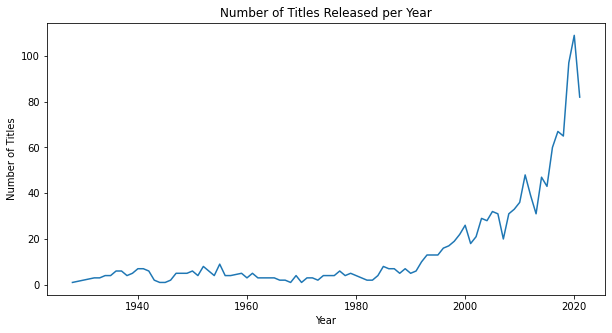

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('disney_plus_titles.csv')

df['release_year'] = pd.to_datetime(df['release_year'], format='%Y')

df['year'] = df['release_year'].dt.year

yearly_data = df.groupby('year').size()

plt.figure(figsize=(10, 5))
sns.lineplot(x=yearly_data.index, y=yearly_data.values)
plt.title('Number of Titles Released per Year')
plt.xlabel('Year')
plt.ylabel('Number of Titles')
plt.show()

                            title  \
0                   A Spark Story   
1                  Spooky Buddies   
2          The Fault in Our Stars   
3                 Dog: Impossible   
4  Spidey And His Amazing Friends   

                                         description  sentiment  
0  Two Pixar filmmakers strive to bring their uni...      0.000  
1  The puppies go on a spooky adventure through a...      0.000  
2  Hazel and Gus share a love that sweeps them on...      0.650  
3  Matt Beisner uses unique approaches to modifyi...      0.375  
4  Spidey teams up with pals to become The Spidey...      0.000  


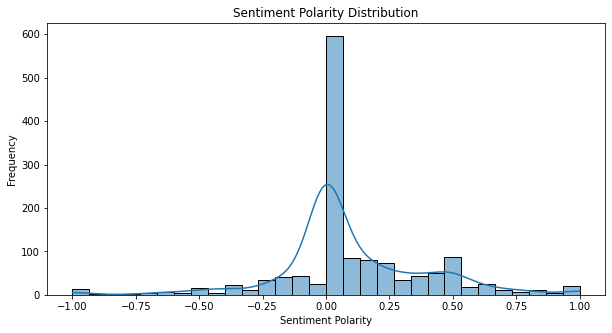

In [2]:
import pandas as pd
from textblob import TextBlob

def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

df['sentiment'] = df['description'].apply(get_sentiment)

print(df[['title', 'description', 'sentiment']].head())

plt.figure(figsize=(10, 5))
sns.histplot(df['sentiment'], bins=30, kde=True)
plt.title('Sentiment Polarity Distribution')
plt.xlabel('Sentiment Polarity')
plt.ylabel('Frequency')
plt.show()

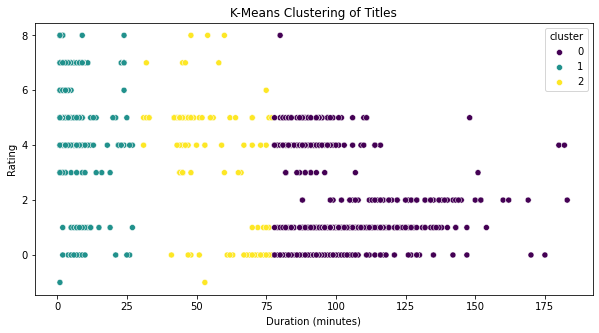

In [8]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import re

df = pd.read_csv('disney_plus_titles.csv')

def extract_minutes(duration_str):
    match = re.search(r'(\d+)', duration_str)
    if match:
        return int(match.group(1))
    return None

df['duration'] = df['duration'].apply(extract_minutes)

df.dropna(subset=['duration'], inplace=True)

df['rating'] = df['rating'].astype('category').cat.codes

kmeans = KMeans(n_clusters=3)
df['cluster'] = kmeans.fit_predict(df[['duration', 'rating']])

plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='duration', y='rating', hue='cluster', palette='viridis')
plt.title('K-Means Clustering of Titles')
plt.xlabel('Duration (minutes)')
plt.ylabel('Rating')
plt.show()
